In [66]:
from MLJEC_MCTruth_Model import *
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from plotterUtils import *

In [2]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['CUDA_VISIBLE_DEVICES']='2'

In [3]:
model = loadModel('model_eta_dense_pt_dense_updatedJuly14')

/usr/local/lib/python2.7/site-packages/keras/engine/topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [64]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 30, 30, 1)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 30, 30, 20)    2440        input_1[0][0]                    
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 30, 30, 20)    0           conv2d_1[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 15, 15, 20)    0           activation_1[0][0]               
___________________________________________________________________________________________

In [4]:
df = pd.read_pickle('new.pkl')

In [6]:
scaler = StandardScaler()
df['jet_eta_ak7_scaled'] = df['jet_eta_ak7'] / 2.5
df['jet_pt_ak7_exp'] = map(np.log,df['jet_pt_ak7'])
df['jet_pt_ak7_scaled'] = scaler.fit_transform(df['jet_pt_ak7_exp'].reshape(-1, 1))
df.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


,event,run,lumi,ak7pfcand_ijet,ak7pfcand_eta,ak7pfcand_phi,ak7pfcand_pt,ak7pfcand_charge,ak7pfcand_id,met,...,jet_isW_ak7,jet_ncand_ak7,pfcand_centered_phi,pfcand_centered_eta,pfcand_riz,pfcand_riy,jet_image,jet_eta_ak7_scaled,jet_pt_ak7_exp,jet_pt_ak7_scaled
0,2828,1,12,0,"[-1.00876903534, -1.00456035137, -1.0215094089...","[-0.202069446445, -0.180981457233, -0.18487790...","[215.670425415, 69.4226837158, 37.9222221375, ...","[0, -1, 0, 1, -1, -1, 1, -1, 0, 0, 0, 0, 0, -1...","[130, 211, 22, 211, 211, 211, 211, 211, 22, 22...",0.000000,...,0,44,"[0.0, 0.0210879892111, 0.0171915441751, 0.0216...","[0.0, 0.00420868396759, -0.0127403736115, -0.0...","[-0.0, 0.00469815336487, -0.0123369838484, -0....","[0.0, -0.0209843351196, -0.0174833700638, -0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",-0.406533,6.198423,2.289548
1,2828,1,12,1,"[1.66161680222, 1.66750192642, 1.68926799297, ...","[-2.74814629555, -2.76039361954, -2.7736279964...","[69.3041152954, 63.403377533, 27.3246078491, 2...","[-1, 1, -1, 1, 0, 1, 1, -1, -1, -1, -1, 1, -1,...","[211, 211, 211, 211, 22, 211, 211, 211, 211, 2...",0.000000,...,0,31,"[0.0, -0.0122473239899, -0.0254817008972, -0.0...","[0.0, 0.00588512420654, 0.0276511907578, 0.009...","[0.0, 0.00705970747938, 0.0300193456077, 0.009...","[0.0, -0.0116099220709, -0.0226410144593, -0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.668941,5.602830,0.828360
2,2828,1,12,2,"[0.528619468212, 0.530503809452, 0.50972801446...","[2.67870116234, 2.38817501068, 2.41568040848, ...","[33.1523323059, 31.7618350983, 16.7182769775, ...","[-1, 0, 1, 1, -1, 0, 0, 1, 0, -1, 1, -1, 1, -1...","[211, 22, 211, 211, 211, 22, 22, 211, 130, 211...",0.000000,...,0,48,"[0.0, -0.290526151657, -0.26302075386, -0.0097...","[0.0, 0.00188434123993, -0.018891453743, 0.075...","[0.0, 0.244369235331, 0.211849410085, 0.046994...","[0.0, -0.145935097235, -0.150232747377, 0.0596...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.205118,5.187951,-0.189479
3,2828,1,12,3,"[-0.301580011845, -0.340516895056, -0.52871024...","[2.22358512878, 2.25516295433, 2.2361035347, 2...","[60.3280105591, 20.7011852264, 13.2065992355, ...","[0, 1, 0, -1, -1, 1, 0, -1, 0, 0, 0, 0, -1, 0,...","[22, 211, 22, 211, 211, 211, 22, 211, 22, 22, ...",0.000000,...,0,24,"[0.0, 0.0315778255463, 0.0125184059143, 0.0205...","[0.0, -0.0389368832111, -0.227130234241, -0.02...","[-0.0, -0.0488473688178, -0.209682385464, -0.0...","[0.0, -0.0112123288744, 0.0896927140644, -0.00...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",-0.135060,4.807371,-1.123170
4,2829,1,12,0,"[0.167199209332, 0.202694311738, 0.16929551959...","[1.42906928062, 1.42884945869, 1.41367650032, ...","[148.439788818, 24.7823085785, 22.5962409973, ...","[0, -1, 1, 0, 1, 0, 1, 1, 1, -1, 0, 0, -1, -1,...","[22, 211, 211, 22, 211, 130, 211, 211, 211, 21...",15.200917,...,0,43,"[0.0, -0.000219821929932, -0.015392780304, -0....","[0.0, 0.0354951024055, 0.00209631025791, 0.011...","[0.0, -0.0292831892341, -0.0105005690769, -0.0...","[0.0, -0.0200694691959, 0.011447847718, 0.0338...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.074879,5.982409,1.759595


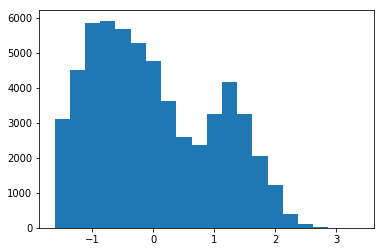

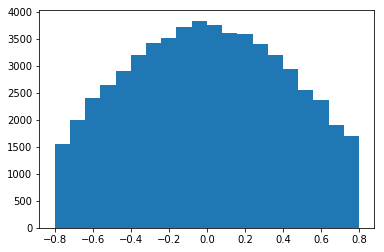

In [7]:
plt.hist(df['jet_pt_ak7_scaled'],bins=20)
plt.show()
plt.hist(df['jet_eta_ak7_scaled'],bins=20)
plt.show()

In [8]:
jet_image = np.array(map(lambda x : x[0] , df['jet_image']))

In [9]:
inputs = [jet_image.reshape([-1,30,30,1]),np.array(df['jet_pt_ak7_scaled']),np.array(df['jet_eta_ak7_scaled'])]

In [10]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy','mse','msle'])

In [11]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

In [12]:
model.fit(inputs, np.array(df['jet_jes_ak7']), validation_data=(inputs, np.array(df['jet_jes_ak7'])), 
                    nb_epoch=50, batch_size=1024, verbose=1, callbacks=[early_stopping])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 58153 samples, validate on 58153 samples
Epoch 1/50
58153/58153 [==============================] - 108s - loss: 0.0069 - acc: 0.0000e+00 - mean_squared_error: 0.0069 - mean_squared_logarithmic_error: 0.0018 - val_loss: 0.0013 - val_acc: 0.0000e+00 - val_mean_squared_error: 0.0013 - val_mean_squared_logarithmic_error: 3.1942e-04

In [14]:
model_json = model.to_json()
with open("model_eta_dense_pt_dense_updatedSept19.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_eta_dense_pt_dense_updatedSept19.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
df['pred'] = model.predict(inputs)
df['residual'] = df['pred']-df['jet_jes_ak7']

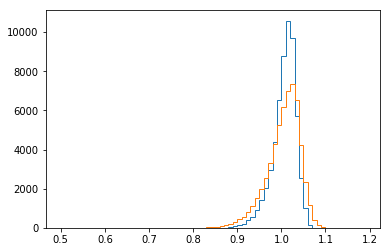

In [34]:
plt.hist(df['pred'],bins=np.arange(0.5,1.2,.01),histtype='step')
plt.hist(df['jet_jes_ak7'],bins=np.arange(0.5,1.2,.01),histtype='step')
plt.show()

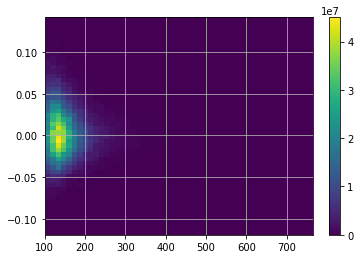

In [58]:
plt.hist2d(df['jet_pt_ak7'],df['residual'],weights=df['mcweight'],bins=50)#,norm=LogNorm())
plt.grid()
plt.colorbar()
plt.show()

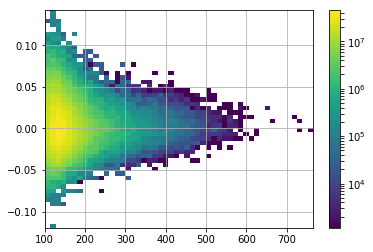

In [60]:
plt.hist2d(df['jet_pt_ak7'],df['residual'],weights=df['mcweight'],bins=50,norm=LogNorm())
plt.grid()
plt.colorbar()
plt.show()

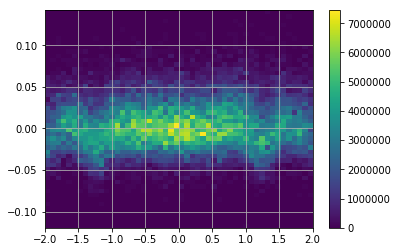

In [61]:
plt.hist2d(df['jet_eta_ak7'],df['residual'],weights=df['mcweight'],bins=50)#,norm=LogNorm())
plt.grid()
plt.colorbar()
plt.show()

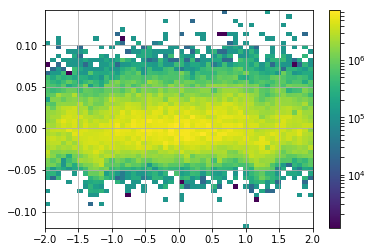

In [62]:
plt.hist2d(df['jet_eta_ak7'],df['residual'],weights=df['mcweight'],bins=50,norm=LogNorm())
plt.grid()
plt.colorbar()
plt.show()

In [50]:
# df['photon_filter'] = df.apply(lambda row : map(lambda x : abs(x)==22,row['ak7pfcand_id']),axis=1)
# df['electron_filter'] = df.apply(lambda row : map(lambda x : abs(x)==11,row['ak7pfcand_id']),axis=1)
# df['muon_filter'] = df.apply(lambda row : map(lambda x : abs(x)==13,row['ak7pfcand_id']),axis=1)
# df['charHad_filter'] = df.apply(lambda row : map(lambda x : abs(x)==211,row['ak7pfcand_id']),axis=1)
# df['neutHad_filter'] = df.apply(lambda row : map(lambda x : abs(x)==130,row['ak7pfcand_id']),axis=1)

# df['jet_photon_mult_ak7'] = df.apply(lambda row : sum(row['photon_filter']),axis=1)
# df['jet_electron_mult_ak7'] = df.apply(lambda row : sum(row['electron_filter']),axis=1)
# df['jet_muon_mult_ak7'] = df.apply(lambda row : sum(row['muon_filter']),axis=1)
# df['jet_charHad_mult_ak7'] = df.apply(lambda row : sum(row['charHad_filter']),axis=1)
# df['jet_neutHad_mult_ak7'] = df.apply(lambda row : sum(row['neutHad_filter']),axis=1)

# df['jet_photon_frac_ak7'] = df.apply(lambda row : sum(np.multiply(row['photon_filter'],row['ak7pfcand_pt']))/row['jet_pt_ak7'],axis=1)
# df['jet_electron_frac_ak7'] = df.apply(lambda row : sum(np.multiply(row['electron_filter'],row['ak7pfcand_pt']))/row['jet_pt_ak7'],axis=1)
# df['jet_muon_frac_ak7'] = df.apply(lambda row : sum(np.multiply(row['muon_filter'],row['ak7pfcand_pt']))/row['jet_pt_ak7'],axis=1)
# df['jet_charHad_frac_ak7'] = df.apply(lambda row : sum(np.multiply(row['charHad_filter'],row['ak7pfcand_pt']))/row['jet_pt_ak7'],axis=1)
# df['jet_neutHad_frac_ak7'] = df.apply(lambda row : sum(np.multiply(row['neutHad_filter'],row['ak7pfcand_pt']))/row['jet_pt_ak7'],axis=1)


In [68]:
#df.to_pickle("new_withCNN.pkl")

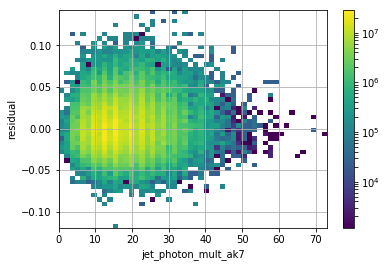

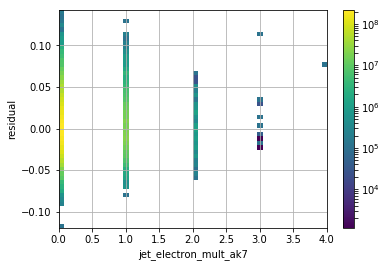

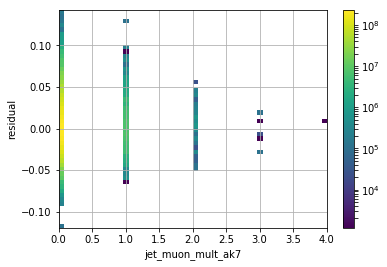

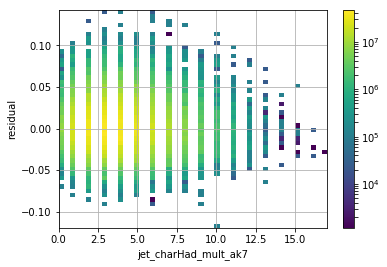

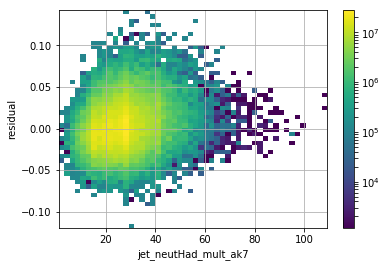

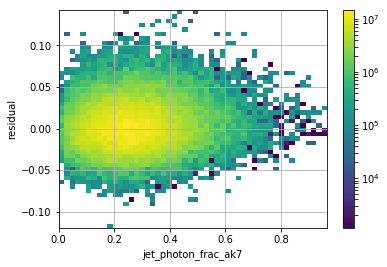

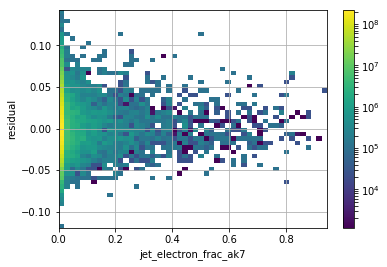

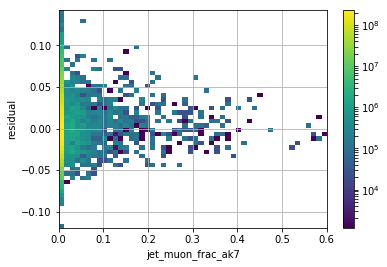

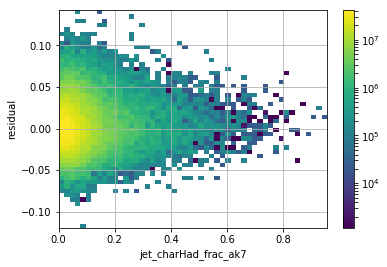

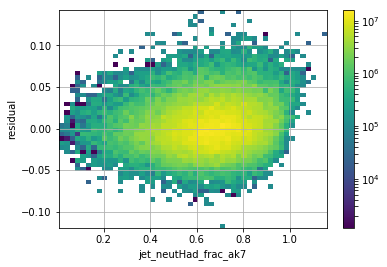

In [63]:
for v in plot_var : 
    plt.hist2d(df[v],df['residual'],weights=df['mcweight'],bins=50,norm=LogNorm())
    plt.grid()
    plt.ylabel('residual')
    plt.xlabel(v)
    plt.colorbar()
    plt.show()

In [72]:
def residual_profile(plot_var,low_bin,high_bin,nbins):
    print "plot_var:",plot_var
    print "low_bin:",low_bin
    print "high_bin:",high_bin
    print "nbins:",nbins
    df[plot_var+'_bins'] = pd.cut(df[plot_var],np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins)),labels=range(nbins))
    means = df.groupby([plot_var+'_bins']).mean()['residual'].values
    counts = df.groupby([plot_var+'_bins']).count()['residual'].values
    sqrt_counts = map(sqrt,counts)
    errs  = df.groupby([plot_var+'_bins']).std()['residual'].values
    errs = errs/sqrt_counts
    bin_center=np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins))
    bin_center = bin_center[:-1]
    bin_center = map(lambda x : x+(high_bin-low_bin)/float(nbins)/2.,bin_center)
    plt.errorbar(x=bin_center,y=means,yerr=errs,fmt='o',color='m')
    plt.xlabel(plot_var)
    plt.ylabel("<residual>")
    plt.ylim(-0.02,0.02)
    plt.show()

plot_var: jet_pt_ak7
low_bin: 100
high_bin: 1000
nbins: 90


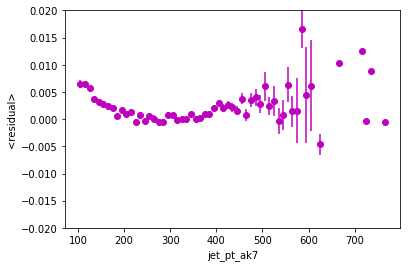

plot_var: jet_eta_ak7
low_bin: -3
high_bin: 3
nbins: 60


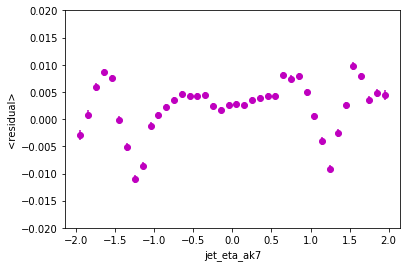

plot_var: jet_electron_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


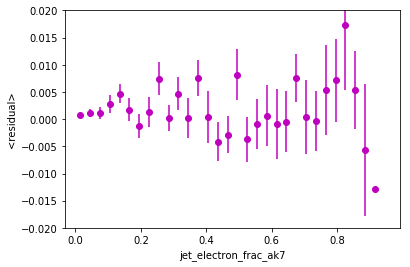

plot_var: jet_muon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


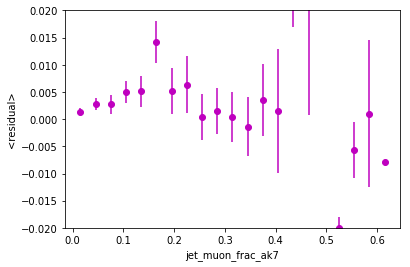

plot_var: jet_photon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


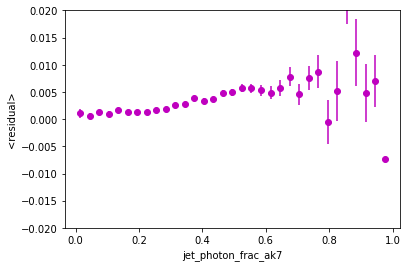

plot_var: jet_neutHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


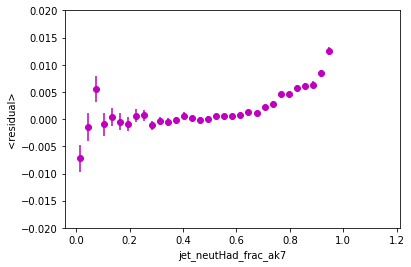

plot_var: jet_charHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


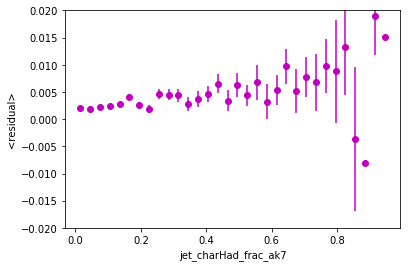

plot_var: jet_electron_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


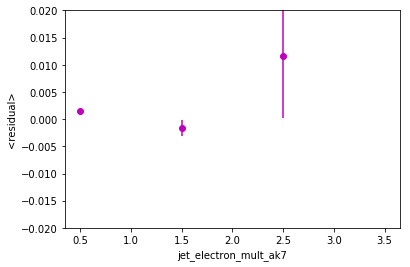

plot_var: jet_muon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


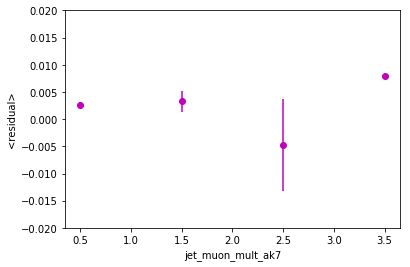

plot_var: jet_photon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


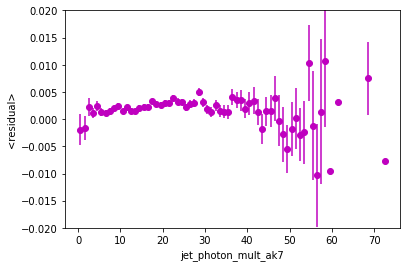

plot_var: jet_neutHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


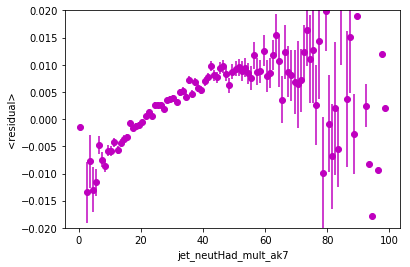

plot_var: jet_charHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


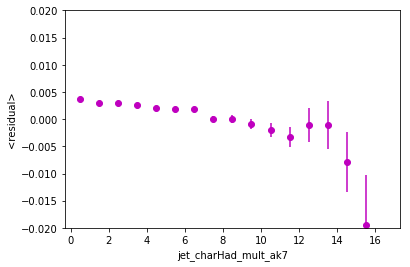

In [82]:
plot_vars=['jet_pt_ak7','jet_eta_ak7','jet_electron_frac_ak7','jet_muon_frac_ak7','jet_photon_frac_ak7','jet_neutHad_frac_ak7','jet_charHad_frac_ak7','jet_electron_mult_ak7','jet_muon_mult_ak7','jet_photon_mult_ak7','jet_neutHad_mult_ak7','jet_charHad_mult_ak7']
var_binning = [(100,1000,90),(-3,3,60),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,100,100),(0,100,100),(0,100,100),(0,100,100),(0,100,100)]
for v,b in zip(plot_vars,var_binning) :
    residual_profile(v,*b)